In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import  GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline  # To handle SMOTE within the pipeline

In [9]:
df=pd.read_csv('credit_card_data.csv')

In [10]:
df.head()

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,24.0,F,Uneducated,Businessman,202326,Single,1,Blue,3544.0,no,no,yes,3.0,0,NaN,NaN,NaN
1,62.0,F,Unknown,Selfemployeed,5225,Married,0,Blue,3421.0,no,no,no,2.0,0,NaN,NaN,NaN
2,32.0,F,Unknown,Selfemployeed,14235,Married,1,Blue,8258.0,no,yes,no,2.0,0,NaN,NaN,NaN
3,38.0,M,Uneducated,Blue-collar,45683,Single,2,Blue,1438.3,no,no,no,1.0,0,NaN,NaN,NaN
4,48.0,M,Graduate,Businessman,59279,Single,4,Blue,3128.0,no,yes,yes,1.0,1,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10941 entries, 0 to 10940
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_Age             10919 non-null  float64
 1   Gender                   10941 non-null  object 
 2   Education_Level          10941 non-null  object 
 3   Customer_Job             10941 non-null  object 
 4   Income                   10941 non-null  int64  
 5   Marital_Status           10941 non-null  object 
 6   Dependent_Count          10941 non-null  int64  
 7   Card_Category            10941 non-null  object 
 8   Credit_Limit             10941 non-null  float64
 9   Personal_loan            10941 non-null  object 
 10  Car_Owner                10941 non-null  object 
 11  House_Owner              10941 non-null  object 
 12  Cust_Satisfaction_Score  10909 non-null  float64
 13  Delinquent_Acc           10941 non-null  int64  
 14  Unnamed: 14           

In [12]:
df.isnull().sum()

Customer_Age                  22
Gender                         0
Education_Level                0
Customer_Job                   0
Income                         0
Marital_Status                 0
Dependent_Count                0
Card_Category                  0
Credit_Limit                   0
Personal_loan                  0
Car_Owner                      0
House_Owner                    0
Cust_Satisfaction_Score       32
Delinquent_Acc                 0
Unnamed: 14                10941
Unnamed: 15                10941
Unnamed: 16                10313
dtype: int64

In [13]:
df.shape

(10941, 17)

In [14]:
df.drop(columns=['Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [15]:
df['Gender']=df['Gender'].replace('F','Female')

In [16]:
df['Gender']=df['Gender'].replace('M','Male')

In [19]:
df.head()

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc
0,24.0,Female,Uneducated,Businessman,202326,Single,1,Blue,3544.0,no,no,yes,3.0,0
1,62.0,Female,Unknown,Selfemployeed,5225,Married,0,Blue,3421.0,no,no,no,2.0,0
2,32.0,Female,Unknown,Selfemployeed,14235,Married,1,Blue,8258.0,no,yes,no,2.0,0
3,38.0,Male,Uneducated,Blue-collar,45683,Single,2,Blue,1438.3,no,no,no,1.0,0
4,48.0,Male,Graduate,Businessman,59279,Single,4,Blue,3128.0,no,yes,yes,1.0,1


In [20]:
df[df['Education_Level']=='Unknown']

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc
1,62.0,Female,Unknown,Selfemployeed,5225,Married,0,Blue,3421.0,no,no,no,2.0,0
2,32.0,Female,Unknown,Selfemployeed,14235,Married,1,Blue,8258.0,no,yes,no,2.0,0
21,37.0,Female,Unknown,Selfemployeed,45476,Married,5,Blue,16411.0,no,yes,yes,3.0,1
24,38.0,Female,Unknown,Businessman,25667,Single,1,Blue,6391.0,no,no,no,3.0,0
35,49.0,Female,Unknown,Selfemployeed,44555,Single,2,Blue,6629.0,no,yes,yes,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,45.0,Female,Unknown,Selfemployeed,35630,Single,3,Blue,30274.0,no,no,no,4.0,1
10912,53.0,Male,Unknown,Govt,60855,Single,0,Blue,1441.3,no,yes,yes,5.0,1
10929,44.0,Male,Unknown,Govt,107360,Single,4,Blue,6568.0,no,yes,yes,5.0,1
10935,65.0,Male,Unknown,White-collar,45780,Married,1,Blue,7360.0,no,yes,yes,4.0,1


In [21]:
df['Education_Level'].value_counts()

Education_Level
Graduate         4460
High School      2160
Unknown          1662
Uneducated       1606
Post-Graduate     557
Doctorate         496
Name: count, dtype: int64

In [22]:
df['Customer_Job'].value_counts()

Customer_Job
Selfemployeed    2801
Businessman      2043
Blue-collar      1695
Govt             1671
White-collar     1659
Retirees         1072
Name: count, dtype: int64

In [23]:
df['Education_Level'].value_counts()

Education_Level
Graduate         4460
High School      2160
Unknown          1662
Uneducated       1606
Post-Graduate     557
Doctorate         496
Name: count, dtype: int64

In [24]:
def replace_unknown_education(row):
    if row['Education_Level'] == 'Unknown':
        if row['Customer_Job'] in ['Selfemployeed', 'Businessman', 'White-collar']:
            return 'Graduate'
        elif row['Customer_Job'] in ['Blue-collar', 'Govt']:
            return 'High School'
        elif row['Customer_Job'] == 'Retirees':
            return 'Post-Graduate'
        else:
            return 'Uneducated'
    return row['Education_Level']

In [25]:
df['Education_Level'] = df.apply(replace_unknown_education, axis=1)

In [26]:
df['Education_Level'].value_counts()

Education_Level
Graduate         5417
High School      2697
Uneducated       1606
Post-Graduate     725
Doctorate         496
Name: count, dtype: int64

In [27]:
df.tail()

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc
10936,57.0,Male,Graduate,White-collar,75291,Married,1,Blue,3147.0,no,yes,no,3.0,1
10937,29.0,Male,Graduate,Businessman,15099,Married,1,Silver,17307.0,no,yes,yes,2.0,1
10938,43.0,Male,Doctorate,Retirees,98665,Single,2,Blue,8077.0,no,no,yes,2.0,1
10939,51.0,Male,High School,Blue-collar,77365,Single,3,Blue,3088.0,yes,yes,no,4.0,1
10940,52.0,Male,High School,Selfemployeed,46225,Single,2,Blue,2341.0,no,no,no,3.0,1


## Cleaning the data

In [28]:
# Categorizing customers based on their credit behavior
def assign_satisfaction(row):
    if pd.isnull(row['Cust_Satisfaction_Score']):
        if row['Delinquent_Acc'] > 0:
            return 2  #  dissatisfied due to missed payments
        elif row['Income'] > 20000:
            return 3  # Moderate satisfaction
        else:
            return 4  # Likely satisfied if they pay on time
    return row['Cust_Satisfaction_Score']



In [29]:
# Apply the function to fill missing values
df['Cust_Satisfaction_Score'] = df.apply(assign_satisfaction, axis=1)

In [30]:
df.isnull().sum()

Customer_Age               22
Gender                      0
Education_Level             0
Customer_Job                0
Income                      0
Marital_Status              0
Dependent_Count             0
Card_Category               0
Credit_Limit                0
Personal_loan               0
Car_Owner                   0
House_Owner                 0
Cust_Satisfaction_Score     0
Delinquent_Acc              0
dtype: int64

In [31]:
df['Customer_Age'] = df['Customer_Age'].fillna(df.groupby('Card_Category')['Customer_Age'].transform('median'))


In [32]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Unknown', 'Divorced'], dtype=object)

In [33]:
## Replacing Divorced with single
df['Marital_Status']=df['Marital_Status'].replace('Divorced','Single')

In [34]:
df['Marital_Status'] = np.where(
    (df['Marital_Status'] == 'Unknown') & (df['Dependent_Count'] >= 2), 'Married',
    np.where(df['Marital_Status'] == 'Unknown', 'Single', df['Marital_Status'])
)

In [35]:
df['Marital_Status'].value_counts()

Marital_Status
Married    6149
Single     4792
Name: count, dtype: int64

In [36]:
df['Delinquent_Acc'].value_counts()

Delinquent_Acc
0    9685
1    1256
Name: count, dtype: int64

In [37]:
df.duplicated().sum()

63

In [38]:
df[df['Credit_Limit']==0]

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc
130,43.0,Female,Graduate,Govt,21828,Married,4,Blue,0.0,no,no,yes,3.0,1
324,54.0,Male,Graduate,Retirees,61406,Married,5,Blue,0.0,no,no,yes,3.0,0
10028,48.0,Male,Post-Graduate,Govt,51839,Married,3,Blue,0.0,no,no,no,5.0,0
10111,50.0,Female,Graduate,Govt,40998,Single,3,Blue,0.0,yes,no,yes,4.0,0
10196,36.0,Male,Graduate,Businessman,90657,Married,2,Blue,0.0,no,yes,no,4.0,0
10217,46.0,Male,Graduate,Businessman,68413,Single,4,Blue,0.0,yes,no,no,1.0,0


In [39]:
df.loc[df['Credit_Limit'] == 0, 'Credit_Limit'] = df['Income'] * 2.5

In [40]:
df[df.duplicated()]

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc
178,26.0,Female,Graduate,Retirees,40785,Single,0,Blue,5090.0,no,yes,no,2.0,1
412,46.0,Male,Graduate,White-collar,64783,Married,3,Silver,34516.0,no,yes,no,2.0,1
413,44.0,Female,Graduate,Blue-collar,34283,Single,4,Blue,2609.0,yes,no,no,3.0,0
590,49.0,Male,Graduate,White-collar,102442,Married,4,Platinum,34516.0,yes,no,yes,2.0,1
591,29.0,Male,Graduate,White-collar,69450,Single,1,Blue,9899.0,no,yes,yes,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10354,26.0,Female,Graduate,Retirees,40785,Single,0,Blue,5093.0,no,yes,no,2.0,1
10375,46.0,Male,Graduate,White-collar,64783,Married,3,Silver,34519.0,no,yes,no,2.0,1
10382,49.0,Male,Graduate,White-collar,102442,Married,4,Platinum,34519.0,yes,no,yes,2.0,1
10383,29.0,Male,Graduate,White-collar,69450,Single,1,Blue,9902.0,no,yes,yes,3.0,1


In [41]:
df.drop_duplicates(inplace=True,keep='first')

In [304]:
df.duplicated().sum()

0

## EDA

In [43]:
df.describe()

,Customer_Age,Income,Dependent_Count,Credit_Limit,Cust_Satisfaction_Score,Delinquent_Acc
count,10878.000000,1.087800e+04,10878.000000,10878.000000,10878.000000,10878.000000
mean,46.327634,5.809944e+04,2.344824,8715.219259,3.189557,0.114543
std,8.161773,8.866722e+04,1.300546,9673.056848,1.266361,0.318484
min,21.000000,5.410000e+02,0.000000,3.000000,0.000000,0.000000
25%,41.000000,2.259450e+04,1.000000,2563.000000,2.000000,0.000000
50%,46.000000,4.478400e+04,2.000000,4584.500000,3.000000,0.000000
75%,52.000000,7.655475e+04,3.000000,11096.750000,4.000000,0.000000
max,97.000000,6.779787e+06,5.000000,226642.500000,5.000000,1.000000


In [44]:
# detecting outliers
numeric_cols = df.select_dtypes(include=['number']).columns


In [45]:
top_5_income = df['Income'].nlargest(5)

In [46]:
top_5_income = df['Income'].nlargest(5)

In [47]:
df = df[~df['Income'].isin(top_5_income.values)]

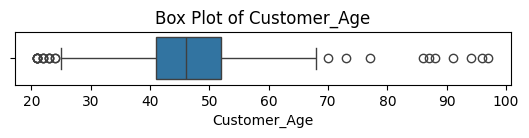

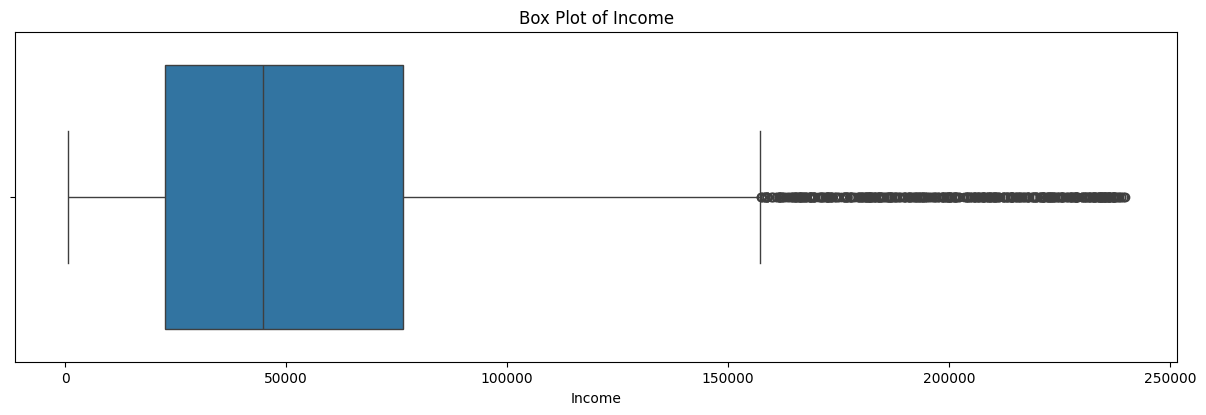

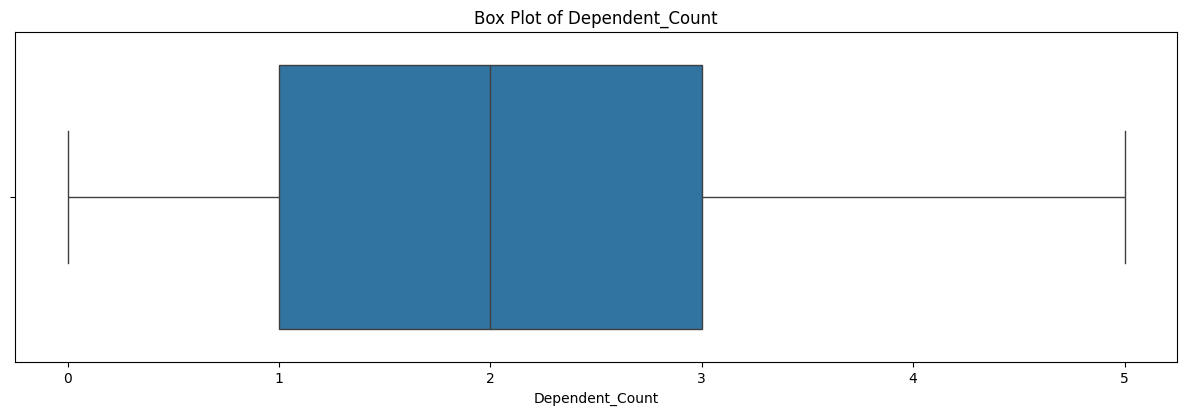

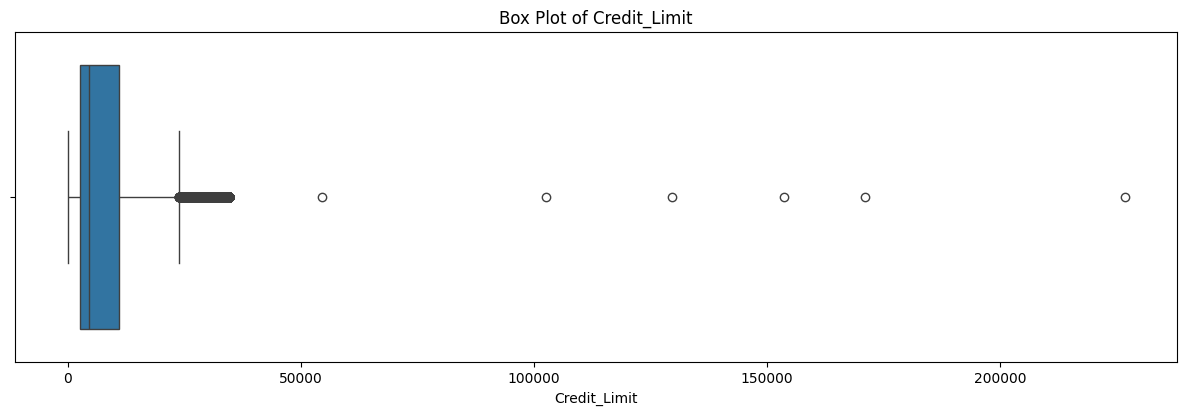

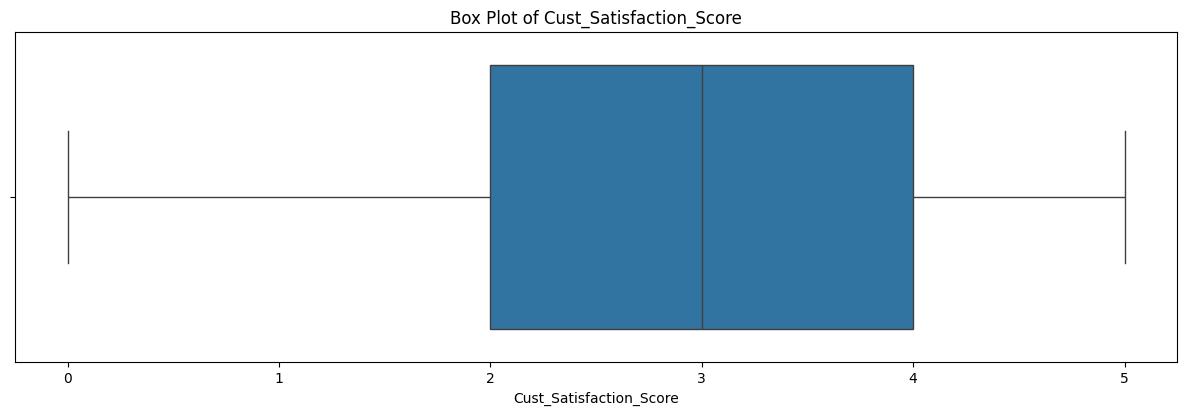

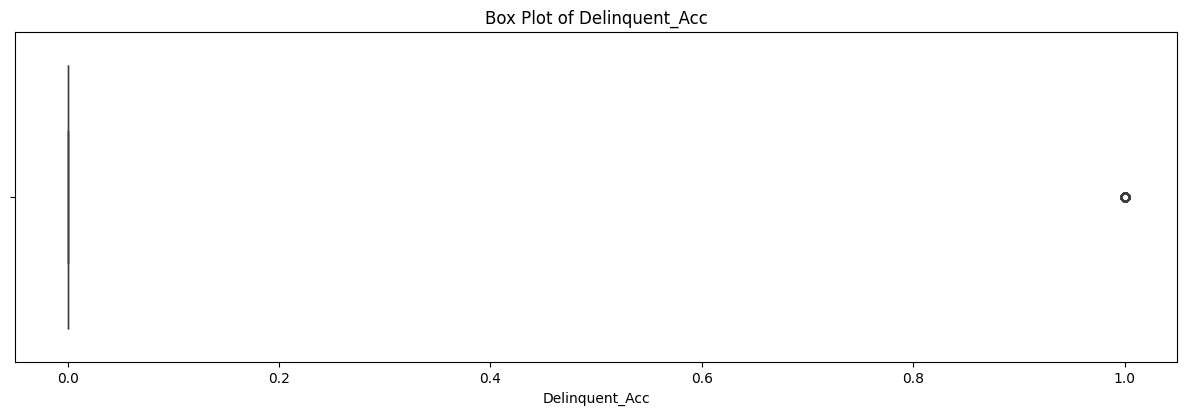

<Figure size 1500x3000 with 0 Axes>

In [48]:
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.figure(figsize=(15, 5 * len(numeric_cols)))

plt.tight_layout()
plt.show()

In [49]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [50]:
# Remove outliers for specific columns using IQR method
for col in ['Income', 'Credit_Limit','Customer_Age']:
    df = remove_outliers_iqr(df, col)

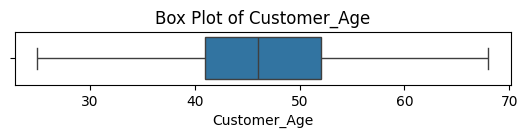

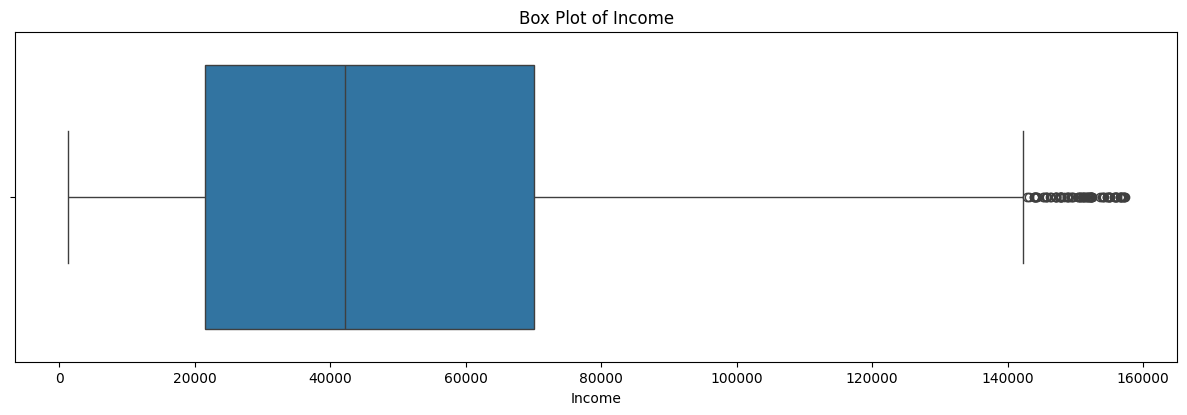

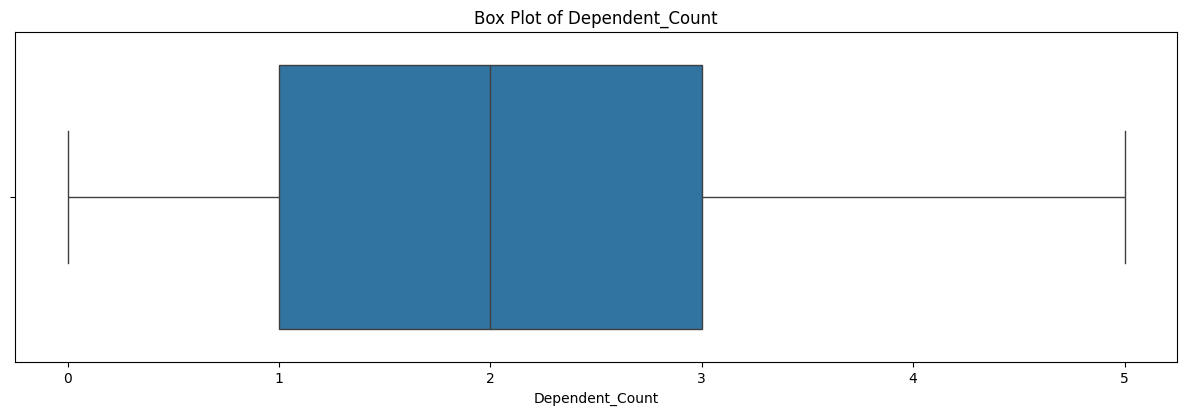

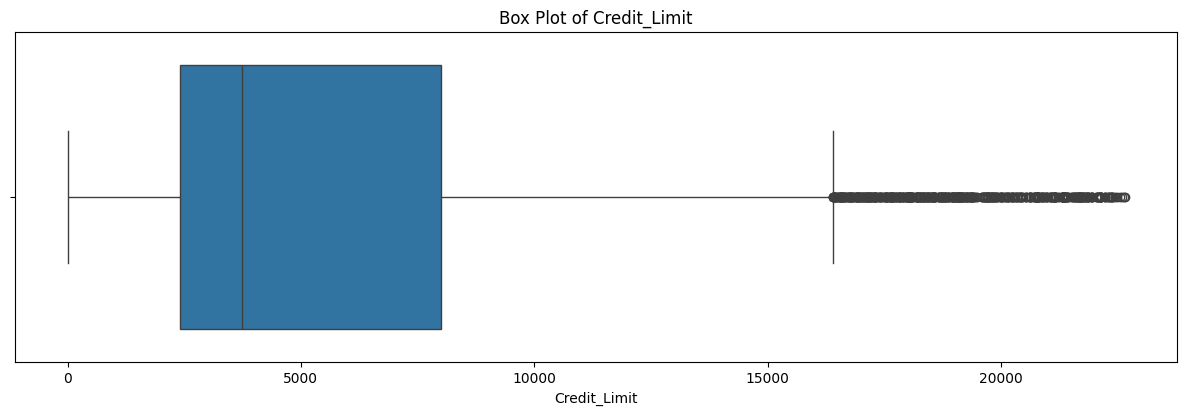

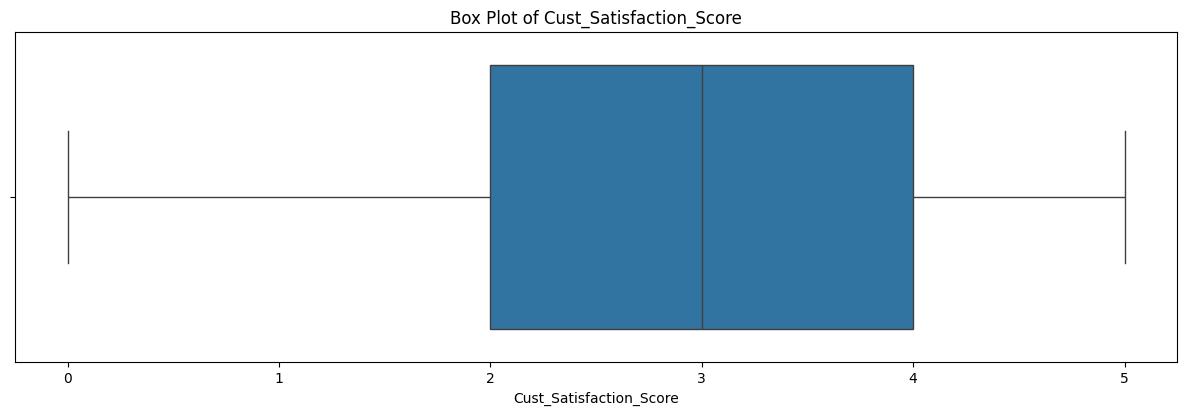

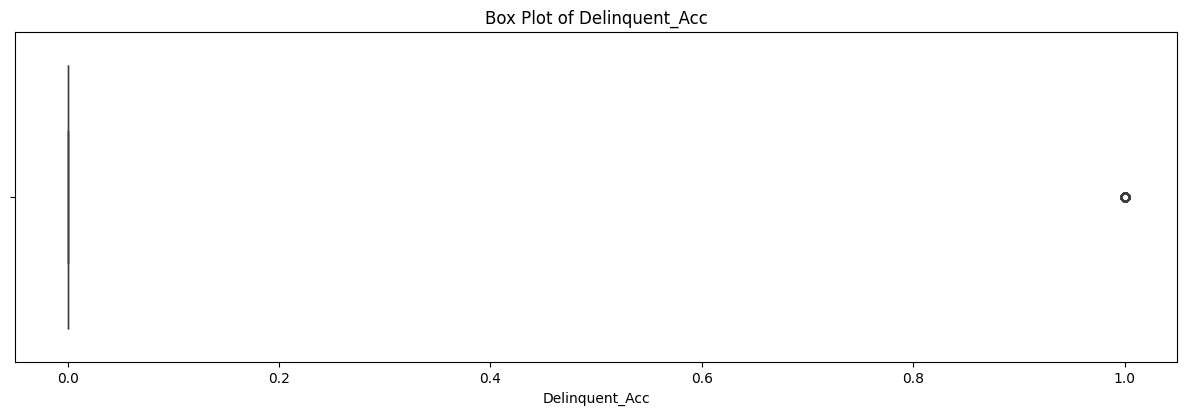

<Figure size 1500x3000 with 0 Axes>

In [51]:
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.figure(figsize=(15, 5 * len(numeric_cols)))

plt.tight_layout()
plt.show()

## plots

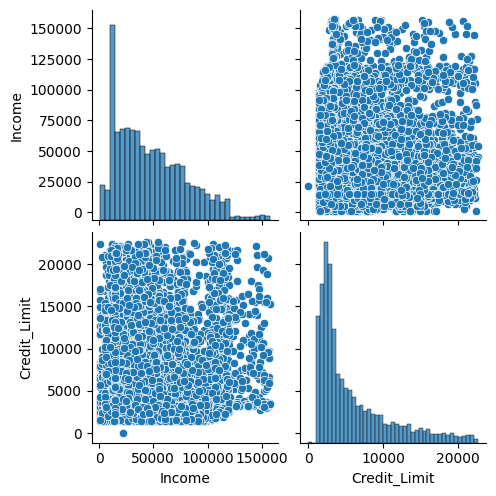

In [314]:
# Visualizing relationships between numerical columns
sns.pairplot(df[['Income', 'Credit_Limit']])
plt.show()


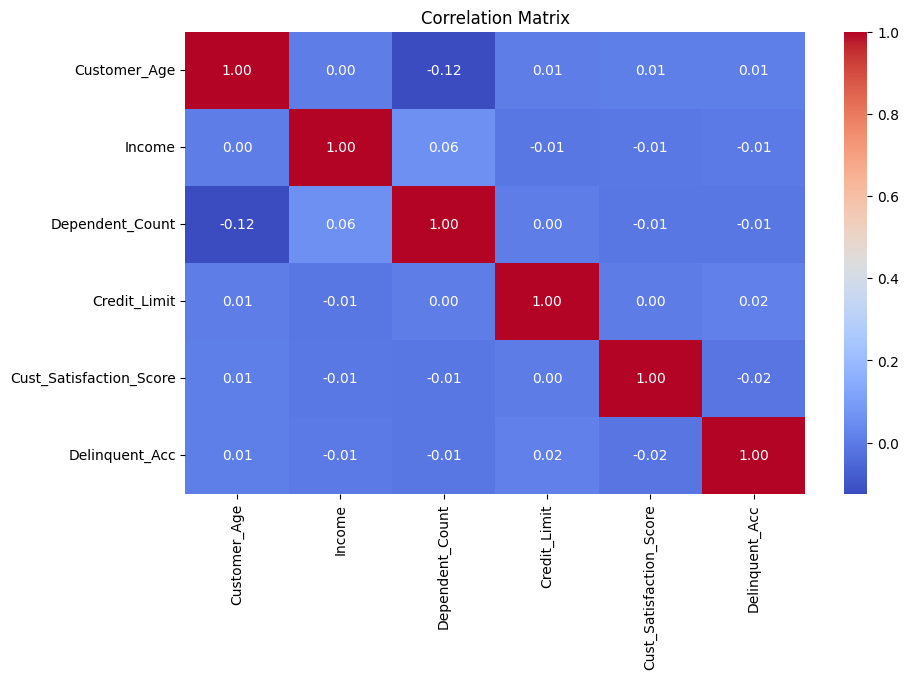

In [315]:
#  correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

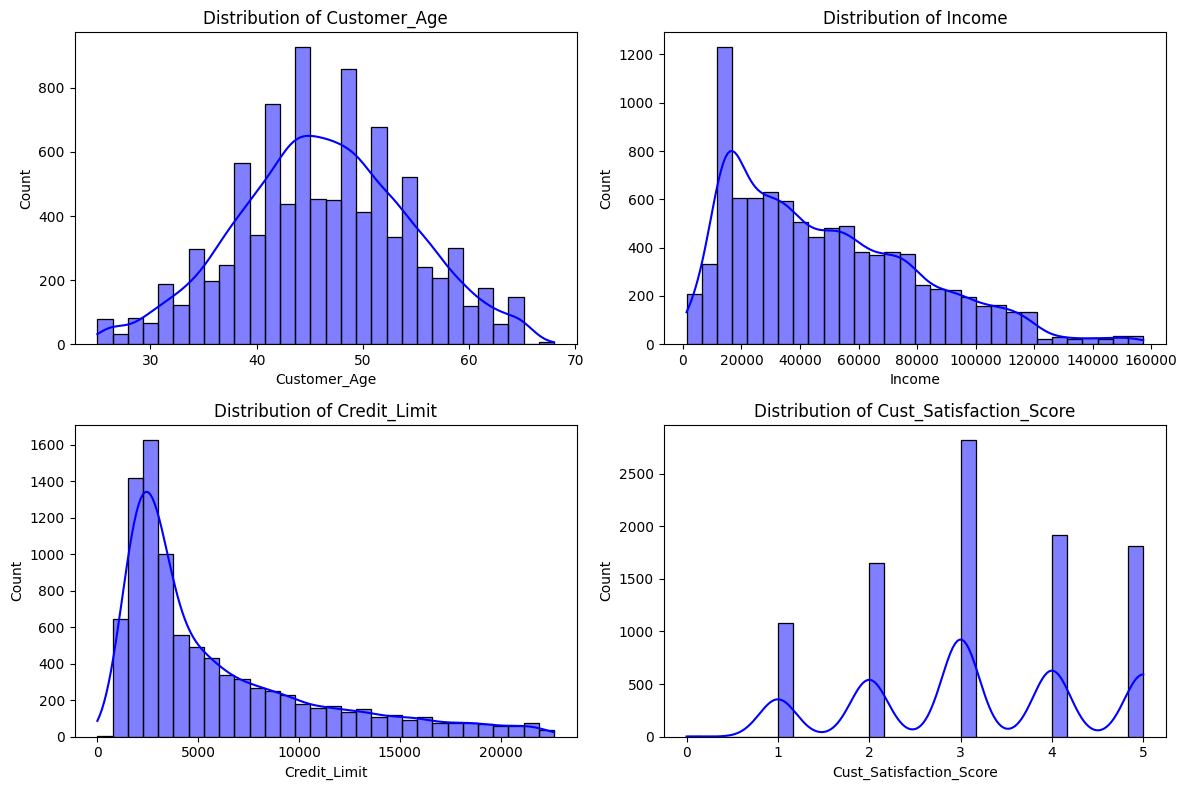

In [53]:
numerical_cols = ['Customer_Age', 'Income', 'Credit_Limit', 'Cust_Satisfaction_Score']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

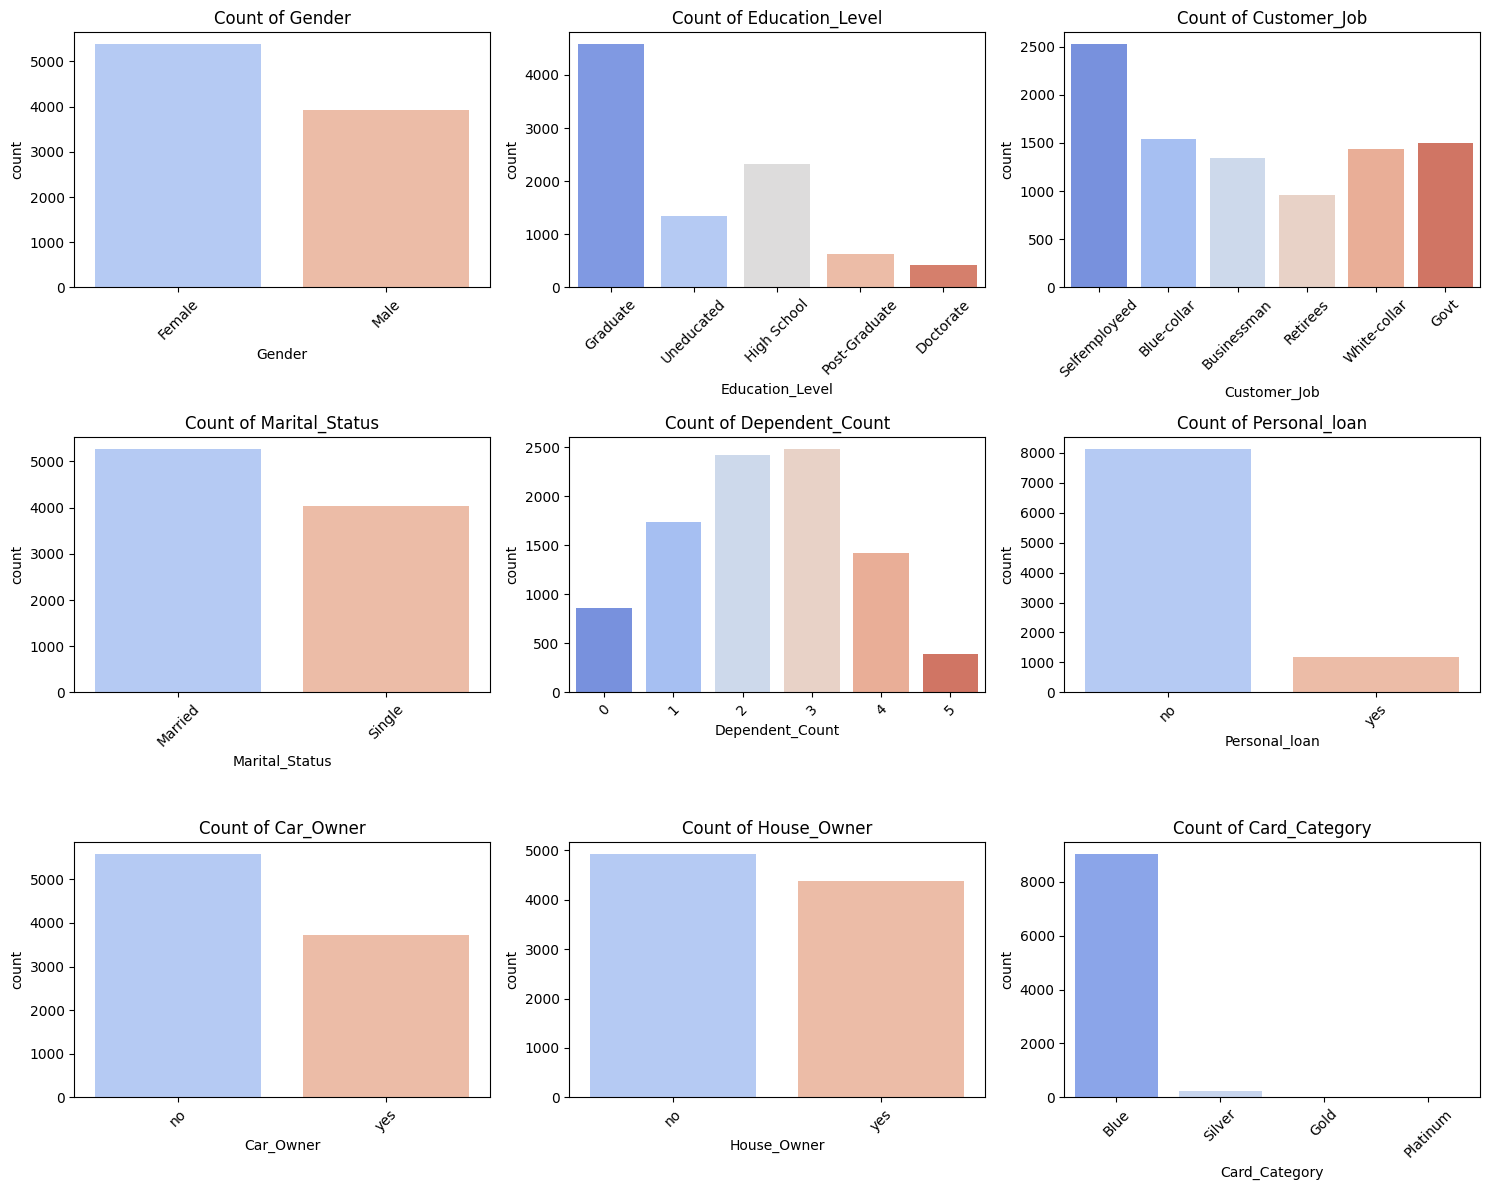

In [317]:
categorical_cols = ['Gender', 'Education_Level', 'Customer_Job', 'Marital_Status', 
                    'Dependent_Count', 'Personal_loan', 
                    'Car_Owner', 'House_Owner','Card_Category']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


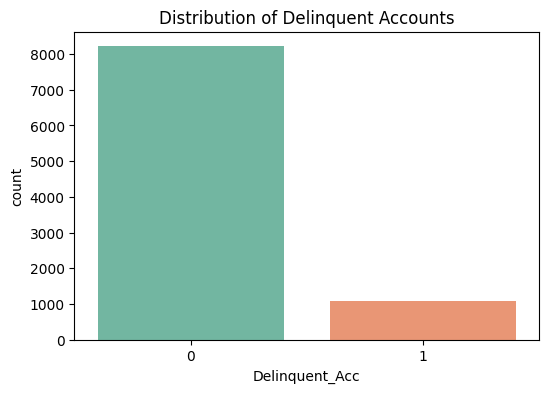

Delinquent_Acc
0    88.395354
1    11.604646
Name: proportion, dtype: float64


In [318]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Delinquent_Acc'], palette="Set2")
plt.title("Distribution of Delinquent Accounts")
plt.show()
# Print percentage distribution
print(df['Delinquent_Acc'].value_counts(normalize=True) * 100)

## High class imbalance in the target variable

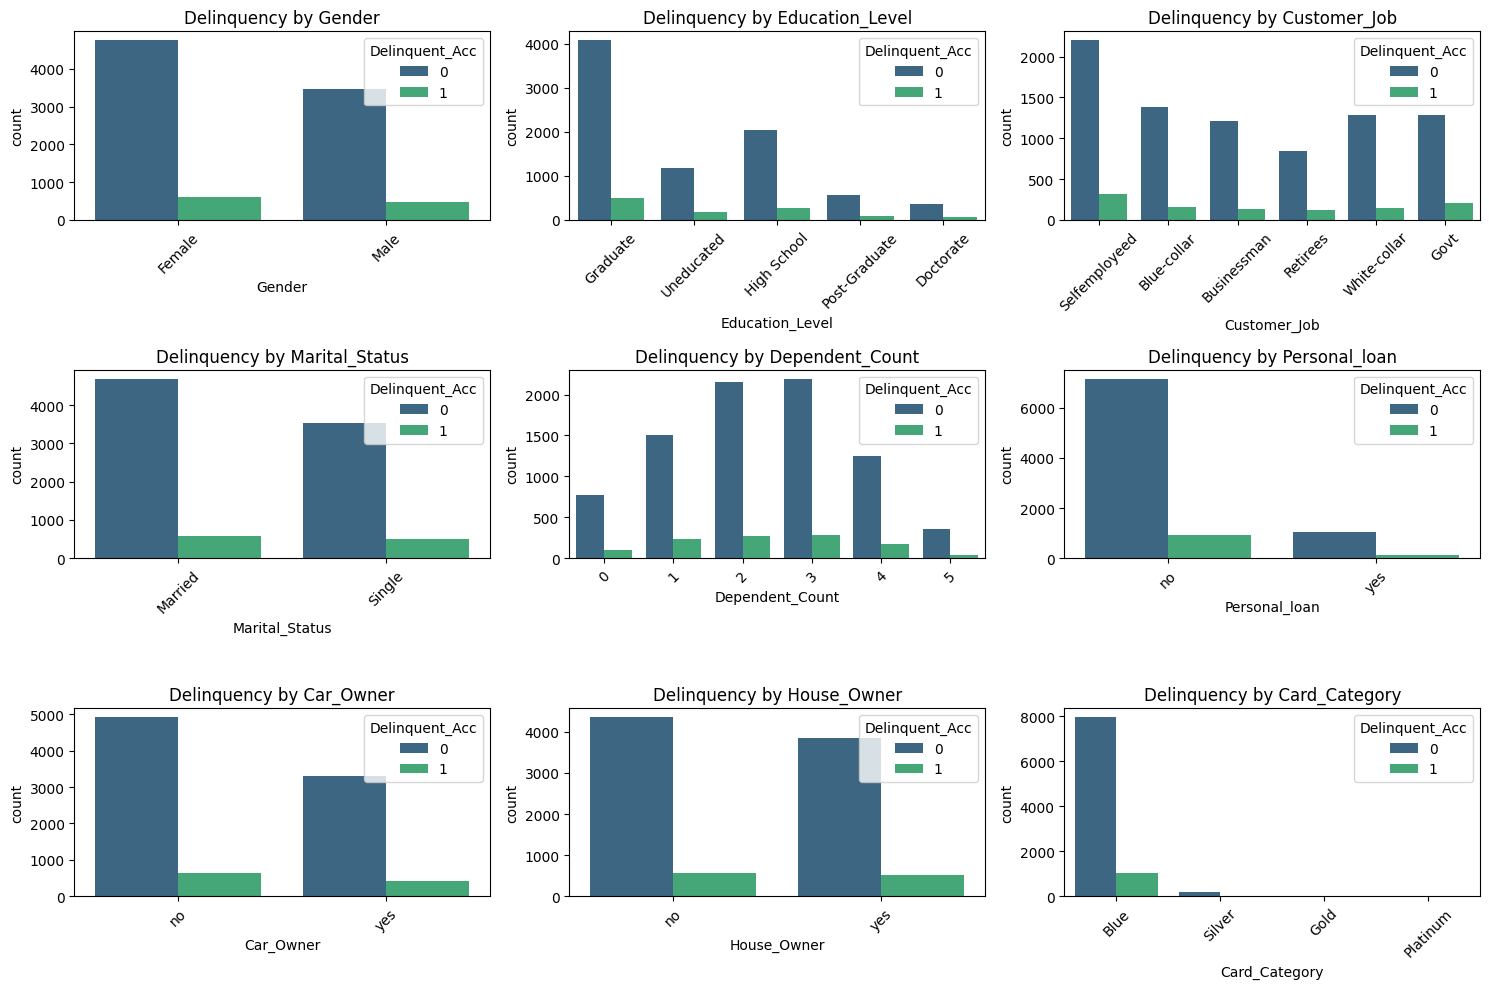

In [319]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue="Delinquent_Acc", palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f'Delinquency by {col}')
plt.tight_layout()
plt.show()

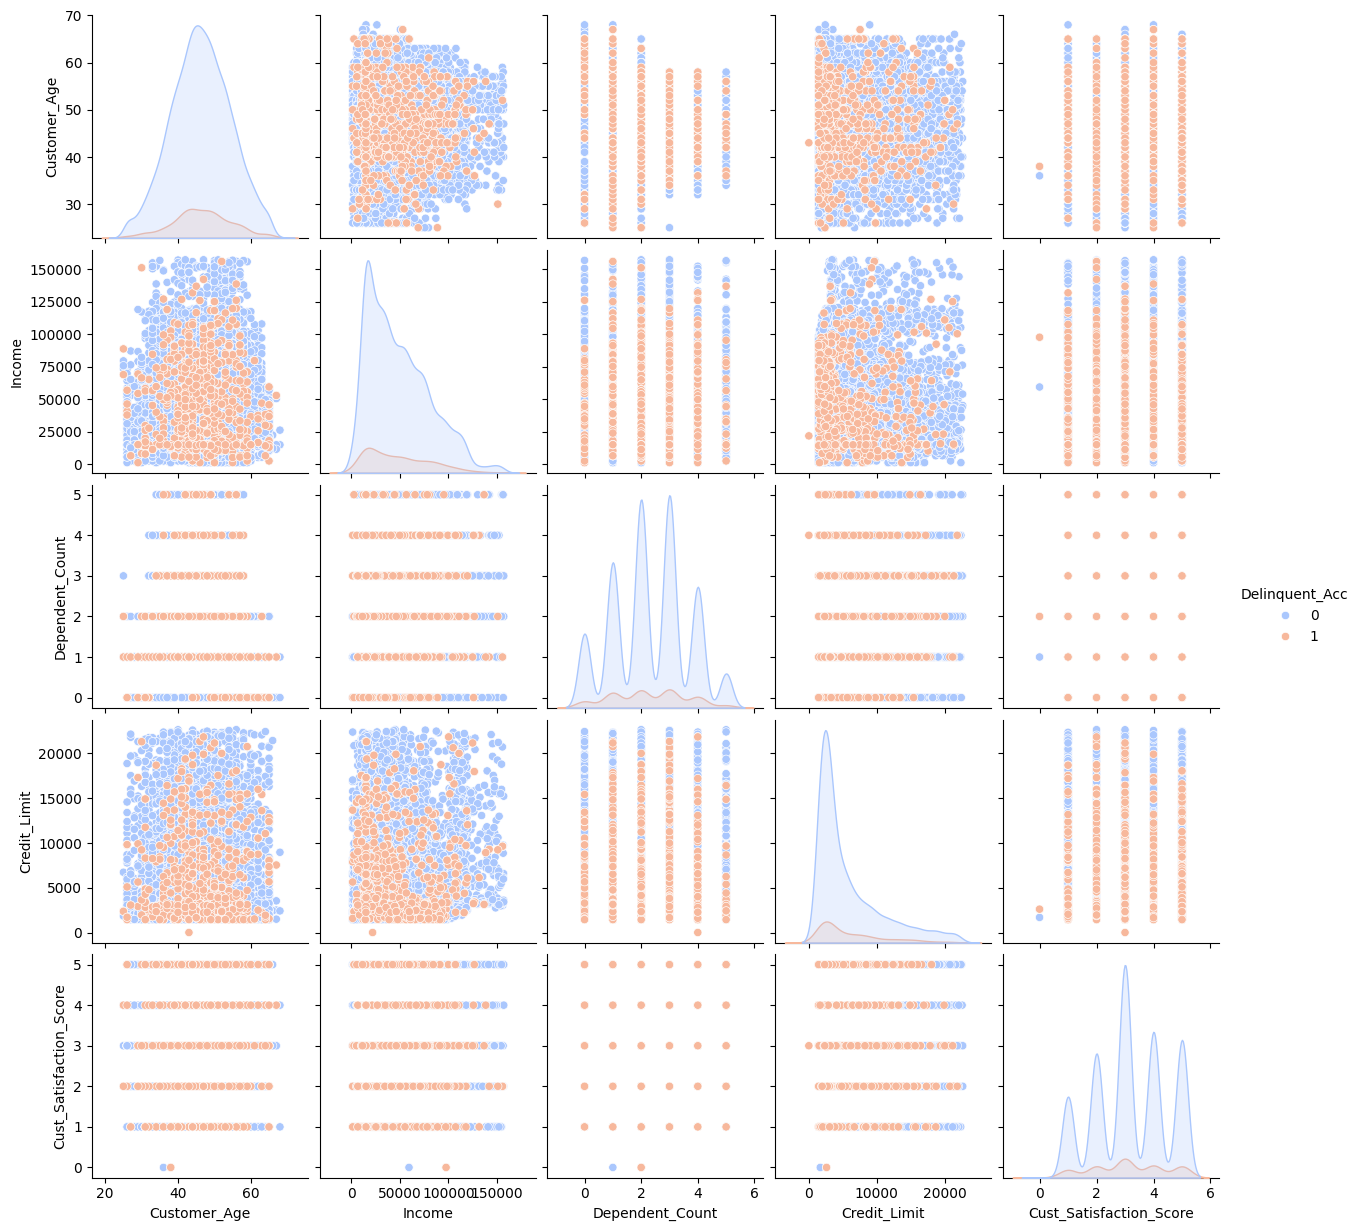

In [320]:
sns.pairplot(df, hue="Delinquent_Acc", diag_kind="kde", palette="coolwarm")
plt.show()# Select only numeric columns
numeric_columns = ['Income', 'Credit_Limit',  
                    'Dependent_Count', 'Cust_Satisfaction_Score','Customer_Age']


In [321]:
cross_tab = pd.crosstab(df['Gender'], df['Marital_Status'])
print(cross_tab)

Marital_Status  Married  Single
Gender                         
Female             2994    2379
Male               2267    1658


In [322]:
# Select only numeric columns
numeric_columns = ['Income', 'Credit_Limit',  
                    'Dependent_Count', 'Cust_Satisfaction_Score','Customer_Age']

In [ ]:
## 

In [323]:
df_numeric = df[numeric_columns]  # Keep only numeric features

In [324]:
# Convert to numeric to avoid errors (force conversion)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

In [325]:
# Fill missing values (if any) with mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

In [326]:
# Convert to NumPy array for VIF calculation
X_values = df_numeric.values  

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_values, i) for i in range(len(df_numeric.columns))]

# Print VIF results
print(vif_data)

                   Feature       VIF
0                   Income  3.200520
1             Credit_Limit  2.364885
2          Dependent_Count  3.736705
3  Cust_Satisfaction_Score  6.415358
4             Customer_Age  9.802553


# Apply One-Hot Encoding

In [327]:
# Define categorical and numerical columns
categorical_cols = ['Card_Category', 'Gender', 'Marital_Status', 'Customer_Job', 
                    'Education_Level', 'Personal_loan', 'Car_Owner', 'House_Owner']
numerical_cols = ['Customer_Age', 'Income', 'Dependent_Count', 'Credit_Limit', 'Cust_Satisfaction_Score']


In [328]:

# Separate features and target
X = df.drop(columns=['Delinquent_Acc'])  # Assuming 'Delinquent_Acc' is the target
y = df['Delinquent_Acc']

In [329]:
# Define transformations
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
])


In [330]:
# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=330,  # Increase trees for stability
    min_samples_split=2,  # Reduce splitting threshold
    min_samples_leaf=1,  # Allow small leaf nodes
    max_features='sqrt',  # Try sqrt instead of log2
    max_depth=100,  # Increase tree depth
    class_weight='balanced_subsample',  # Adjust weight balancing
    bootstrap=False,  # Enable bagging for robustness
    random_state=2
)


In [331]:
# Create a pipeline with SMOTE for handling class imbalance
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Oversampling minority class
    ('classifier', rf_model)
])


In [332]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [333]:

# Train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Card_Category', 'Gender',
                                                   'Marital_Status',
                                                   'Customer_Job',
                                                   'Education_Level',
                                                   'Personal_loan', 'Car_Owner',
                                                   'House_Owner']),
                                                 ('scaler', StandardScaler(),
                                                  ['Customer_Age', 'Income',
                                                   'Dependent_Count',
                                                   'Credit_Limit',
                                                   'Cust_Satisfaction_Score'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced_subsample',
                                        max_depth=100, n_estimators=330,
                                        random_state=2))])

In [334]:

# Make predictions
y_pred = pipeline.predict(X_test)


In [335]:

# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1644
           1       0.95      0.84      0.89       216

    accuracy                           0.98      1860
   macro avg       0.97      0.92      0.94      1860
weighted avg       0.98      0.98      0.98      1860



Confusion Matrix:
 [[1635    9]
 [  35  181]]


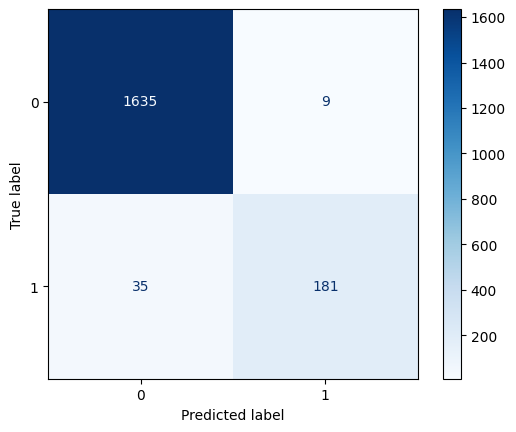

In [336]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred = pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [337]:
df1=df.copy()

In [338]:
df1.head()

,Customer_Age,Gender,Education_Level,Customer_Job,Income,Marital_Status,Dependent_Count,Card_Category,Credit_Limit,Personal_loan,Car_Owner,House_Owner,Cust_Satisfaction_Score,Delinquent_Acc
1,62.0,Female,Graduate,Selfemployeed,5225,Married,0,Blue,3421.0,no,no,no,2.0,0
2,32.0,Female,Graduate,Selfemployeed,14235,Married,1,Blue,8258.0,no,yes,no,2.0,0
3,38.0,Male,Uneducated,Blue-collar,45683,Single,2,Blue,1438.3,no,no,no,1.0,0
4,48.0,Male,Graduate,Businessman,59279,Single,4,Blue,3128.0,no,yes,yes,1.0,1
6,34.0,Female,Graduate,Selfemployeed,14975,Single,3,Blue,2834.0,no,yes,no,2.0,1


In [339]:
# Function to evaluate model and print confusion matrix
def evaluate_model(model, X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    
    # Print Accuracy & Classification Report
    print(f"\n🔹 {dataset_name} Performance:")
    print(f"✅ Accuracy: {accuracy_score(y, y_pred):.4f}")
    print("✅ Classification Report:\n", classification_report(y, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.show()


In [340]:
# Identify categorical columns
categorical_cols = ['Card_Category', 'Gender', 'Marital_Status',
                    'Customer_Job', 'Education_Level', 'Personal_loan', 
                    'Car_Owner', 'House_Owner']

# Apply One-Hot Encoding
df1= pd.get_dummies(df1, columns=categorical_cols, drop_first=True)


In [341]:
# Define features (X) and target variable (y)
X = df1.drop(columns=['Delinquent_Acc'])
y = df1['Delinquent_Acc']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [343]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [344]:
# Check class distribution after SMOTE
print(y_train_smote.value_counts())

Delinquent_Acc
0    6575
1    6575
Name: count, dtype: int64


## Model building using logisticRegression

In [345]:
# Train model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', random_state=42)

In [346]:
# Predict on test data
y_pred = log_reg.predict(X_test)

In [347]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1644
           1       0.12      0.31      0.17       216

    accuracy                           0.65      1860
   macro avg       0.50      0.50      0.47      1860
weighted avg       0.80      0.65      0.71      1860



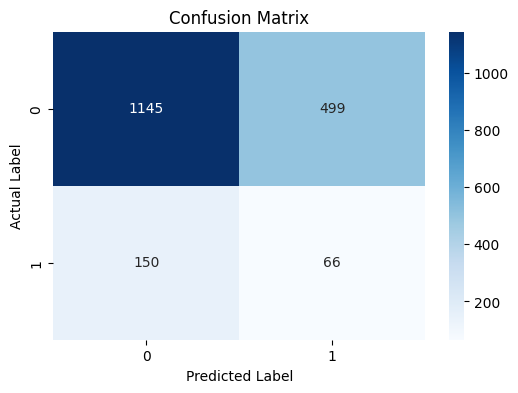

In [348]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

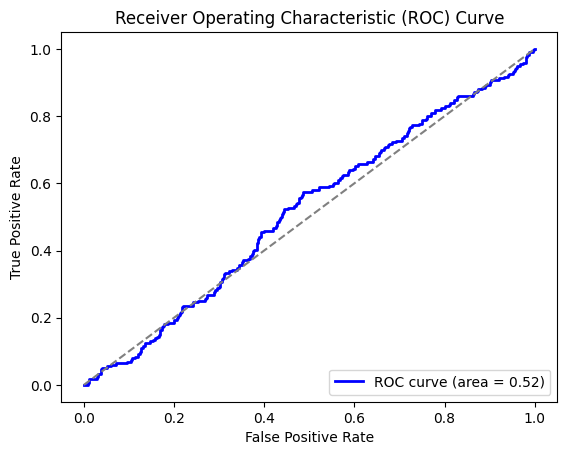

In [349]:
# ROC and AUC Curve
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression Performance:

🔹 Dataset Performance:
✅ Accuracy: 0.7790
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      1644
           1       0.14      0.17      0.15       216

    accuracy                           0.78      1860
   macro avg       0.51      0.52      0.51      1860
weighted avg       0.80      0.78      0.79      1860



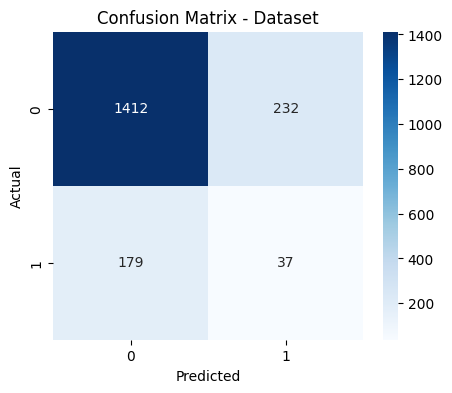

In [350]:
# Logistic Regression with Regularization
log_reg = LogisticRegression(class_weight='balanced', penalty='l2', C=1.0, solver='liblinear', random_state=42)
log_reg.fit(X_train_smote, y_train_smote)
print("Logistic Regression Performance:")
evaluate_model(log_reg, X_test, y_test)

## Model building using desicion tree

In [351]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

In [352]:
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

Decision Tree Performance:

🔹 Dataset Performance:
✅ Accuracy: 0.8785
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1644
           1       0.49      0.83      0.61       216

    accuracy                           0.88      1860
   macro avg       0.73      0.86      0.77      1860
weighted avg       0.92      0.88      0.89      1860



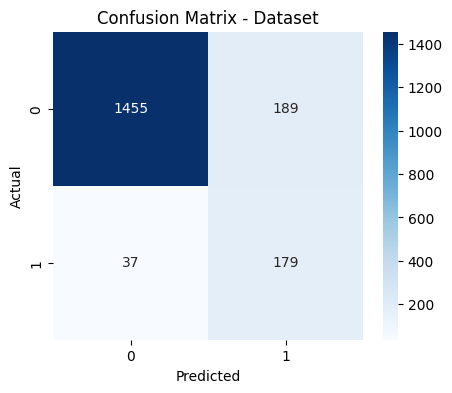


🔹 Dataset Performance:
✅ Accuracy: 0.9998
✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6575
           1       1.00      1.00      1.00      6575

    accuracy                           1.00     13150
   macro avg       1.00      1.00      1.00     13150
weighted avg       1.00      1.00      1.00     13150



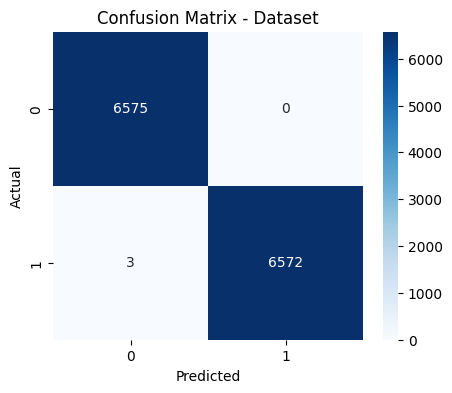

In [353]:
print("Decision Tree Performance:")
evaluate_model(dt_model, X_test, y_test)
evaluate_model(dt_model, X_train_smote, y_train_smote)

In [354]:
# Hyperparameter tuning for Decision Tree
dt_params = {
    'max_depth': [5, 7,10,None],
    'min_samples_split': [2, 5,7,10],
    'min_samples_leaf': [1, 2, 5]
}

In [355]:
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')

In [356]:
dt_model.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='accuracy')

Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Performance:

🔹 Dataset Performance:
✅ Accuracy: 0.8785
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1644
           1       0.49      0.83      0.61       216

    accuracy                           0.88      1860
   macro avg       0.73      0.86      0.77      1860
weighted avg       0.92      0.88      0.89      1860



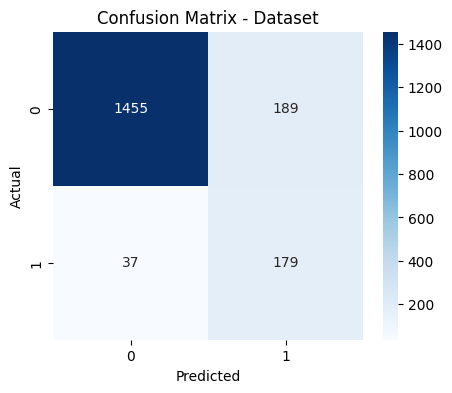

In [357]:
print("Best Decision Tree Parameters:", dt_model.best_params_)
print("Tuned Decision Tree Performance:")
evaluate_model(dt_model.best_estimator_, X_test, y_test)

## Model bulding Using Random Forest

In [358]:
# Random Forest Model

rf_model = RandomForestClassifier(
    n_estimators=275,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=70,
    class_weight='balanced',
    bootstrap=False,
    random_state=42
)

In [359]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=70,
                       max_features='log2', min_samples_split=4,
                       n_estimators=275, random_state=42)

Random Forest Performance:

🔹 Dataset Performance:
✅ Accuracy: 0.9997
✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6575
           1       1.00      1.00      1.00      6575

    accuracy                           1.00     13150
   macro avg       1.00      1.00      1.00     13150
weighted avg       1.00      1.00      1.00     13150



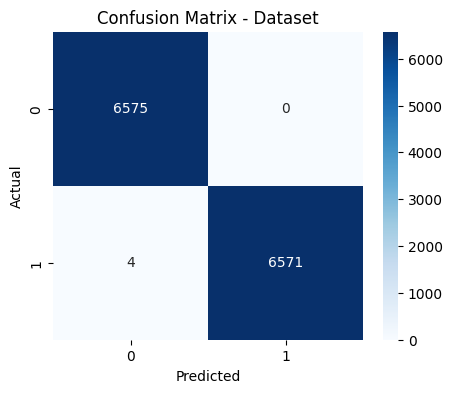


🔹 Dataset Performance:
✅ Accuracy: 0.9758
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1644
           1       0.93      0.85      0.89       216

    accuracy                           0.98      1860
   macro avg       0.96      0.92      0.94      1860
weighted avg       0.98      0.98      0.98      1860



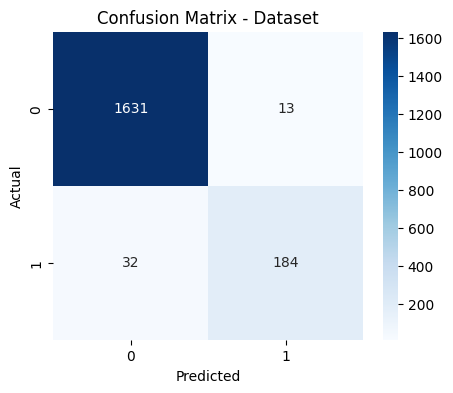

In [360]:
print("Random Forest Performance:")
evaluate_model(rf_model, X_train_smote, y_train_smote)
evaluate_model(rf_model, X_test, y_test)

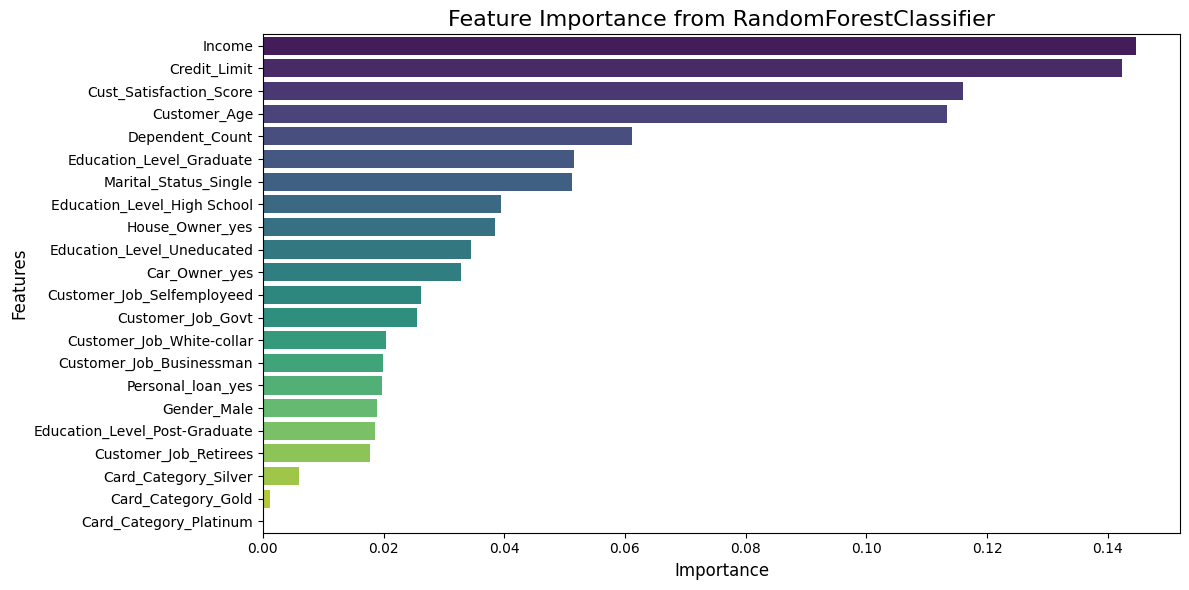

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Dynamically extract feature names
feature_names = X_train_smote.columns.tolist()

# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from RandomForestClassifier', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

## Model building using XGBoost

XGBoost Performance:

🔹 Dataset Performance:
✅ Accuracy: 0.8887
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1644
           1       0.55      0.23      0.32       216

    accuracy                           0.89      1860
   macro avg       0.73      0.60      0.63      1860
weighted avg       0.86      0.89      0.87      1860



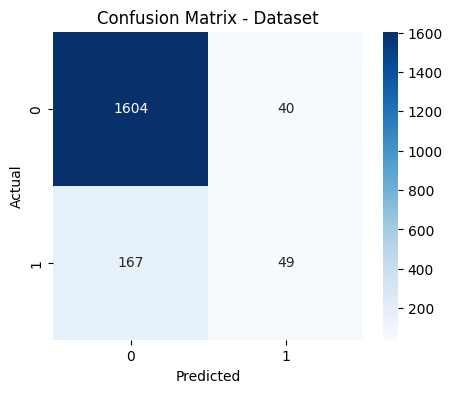

In [362]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
print("XGBoost Performance:")
evaluate_model(xgb_model, X_test, y_test)

In [363]:
print(df.columns.tolist())

['Customer_Age', 'Gender', 'Education_Level', 'Customer_Job', 'Income', 'Marital_Status', 'Dependent_Count', 'Card_Category', 'Credit_Limit', 'Personal_loan', 'Car_Owner', 'House_Owner', 'Cust_Satisfaction_Score', 'Delinquent_Acc']
